<a href="https://colab.research.google.com/github/satyasri77/word_embedding/blob/main/word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-01-09 11:58:59--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-01-09 11:58:59--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-01-09 11:58:59--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
path_to_glove_file = '/content/glove.6B.100d.txt'

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embeddings_index['question']

array([-1.2743e-01,  4.3527e-01,  8.6000e-01,  1.5689e-01, -4.3569e-01,
        1.1583e-01, -2.1007e-01, -5.0635e-01,  6.4092e-01, -4.6156e-01,
       -1.9420e-01,  5.8436e-01,  6.9742e-02, -1.1545e-01, -3.2735e-01,
       -3.9723e-01, -2.0121e-01,  5.8893e-01, -5.7793e-01, -1.9917e-01,
       -2.9232e-02, -3.0948e-01, -3.2966e-01, -4.6377e-01,  1.6894e-01,
       -2.1959e-01,  2.2170e-01, -3.2093e-01, -2.8745e-01,  1.0514e-01,
       -3.0371e-01,  1.6153e-01,  3.8239e-01, -1.1834e-01, -2.6868e-01,
        1.1647e-01, -2.6755e-01,  8.7568e-02,  3.8210e-01, -2.8546e-01,
       -7.4351e-01, -2.4122e-01,  4.6977e-01, -4.8640e-01, -8.4232e-01,
       -5.2109e-01,  3.4324e-01, -2.6099e-01, -7.5433e-01, -7.7240e-01,
        9.5811e-01,  1.0273e-01,  2.2422e-01,  1.2683e+00, -1.8940e-01,
       -1.8174e+00,  1.6384e-01, -4.3998e-01,  1.4220e+00,  4.3426e-01,
       -1.5507e-01,  6.2946e-01, -6.7967e-04, -3.8197e-01,  1.5199e+00,
       -2.0684e-01,  3.8709e-01,  2.5181e-01, -5.3548e-01,  3.56

In [ ]:
def cosine_similarity(A, B):
    dot = np.dot(A,B)    
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)    
    cos = dot/(norma*normb)
    return cos

In [ ]:
king = embeddings_index['king']
queen = embeddings_index['war']

cosine_similarity(king, queen)

0.4685552

In [ ]:
def compute_pca(X, n_components=2):

    # mean center the data
    X_demeaned = X - np.mean(X,axis=0)

    # calculate the covariance matrix
    covariance_matrix = np.cov(X_demeaned,rowvar=False)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')

    # sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted =  np.argsort(eigen_vals)

    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing = idx_sorted[::-1]

    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]
    
    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]

    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    eigen_vecs_subset = eigen_vecs_sorted[:,0:n_components]
    
    # transform the data by multiplying the transpose of the eigenvectors with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = (eigen_vecs_subset.T @ X_demeaned.T).T

    return X_reduced

In [ ]:
words = ['pencil', 'pen','book','news', 'happy', 'sad', 'city',
         'village', 'country', 'continent', 'joyful',
         'king','queen','kingdom']

In [ ]:
X = np.zeros([len(words), 100], dtype = float)
for i in range(len(words)):
  m = embeddings_index[words[i]]
  m = m.reshape(1,100)
  # print(m.shape,X.shape)
  # print(m)
  X[i] = m
X.shape

(14, 100)

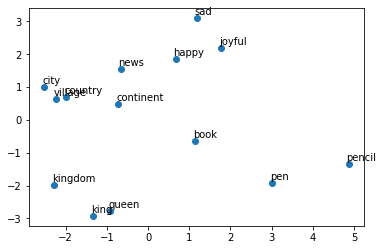

In [ ]:
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()